#   >>>>>>>>>>>>>>>>  PROJECT <<<<<<<<<<<<<<<

#  < _________________AIRLINE DELAY CLASSIFICATION___________________

In [1]:
import pandas as pd
data=pd.read_csv("Airline.csv")
pd.DataFrame(data)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [2]:
shuffled_data=data.sample(150000).reset_index(drop=True)
print(shuffled_data)

            id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  \
0       401189      AS     621         LAS       PDX          4  1230     137   
1       125826      HA     535         OGG       HNL          3   621      34   
2       315779      AA    1905         DCA       DFW          7   600     225   
3        56533      CO     229         DEN       EWR          6   505     223   
4        95025      DL    1430         MKE       DTW          1   840      82   
...        ...     ...     ...         ...       ...        ...   ...     ...   
149995   10765      WN    3762         LAS       RNO          3   905      80   
149996  470329      US     926         JAX       CLT          2   420      83   
149997   11381      OO    6916         DEN       ABQ          3   940      70   
149998  421343      9E    3710         DTW       ELM          6   600      79   
149999  498585      MQ    3938         ORD       LIT          3   925     115   

        Delay  
0          

In [3]:
df=pd.DataFrame(shuffled_data)
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,401189,AS,621,LAS,PDX,4,1230,137,0
1,125826,HA,535,OGG,HNL,3,621,34,0
2,315779,AA,1905,DCA,DFW,7,600,225,0
3,56533,CO,229,DEN,EWR,6,505,223,1
4,95025,DL,1430,MKE,DTW,1,840,82,0
...,...,...,...,...,...,...,...,...,...
149995,10765,WN,3762,LAS,RNO,3,905,80,1
149996,470329,US,926,JAX,CLT,2,420,83,1
149997,11381,OO,6916,DEN,ABQ,3,940,70,0
149998,421343,9E,3710,DTW,ELM,6,600,79,1


In [4]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,270117.176640,2425.409033,3.930000,802.604807,132.517707,0.445987
std,155894.082935,2066.528727,1.915635,278.167521,70.343662,0.497076
min,9.000000,1.000000,1.000000,10.000000,24.000000,0.000000
25%,135157.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,270451.500000,1800.000000,4.000000,795.000000,115.000000,0.000000
75%,405514.750000,3744.000000,5.000000,1035.000000,162.000000,1.000000
max,539379.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [5]:
d={0:"yes",1:"no"}
df["categorical data"]=df["Delay"].map(d)

In [6]:
#missing value checking
missing_values=df.isnull().sum()
missing_values

id                  0
Airline             0
Flight              0
AirportFrom         0
AirportTo           0
DayOfWeek           0
Time                0
Length              0
Delay               0
categorical data    0
dtype: int64

In [7]:
df.dtypes

id                   int64
Airline             object
Flight               int64
AirportFrom         object
AirportTo           object
DayOfWeek            int64
Time                 int64
Length               int64
Delay                int64
categorical data    object
dtype: object

In [8]:
new_data= df.drop(columns = ['id'])
new_data

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,categorical data
0,AS,621,LAS,PDX,4,1230,137,0,yes
1,HA,535,OGG,HNL,3,621,34,0,yes
2,AA,1905,DCA,DFW,7,600,225,0,yes
3,CO,229,DEN,EWR,6,505,223,1,no
4,DL,1430,MKE,DTW,1,840,82,0,yes
...,...,...,...,...,...,...,...,...,...
149995,WN,3762,LAS,RNO,3,905,80,1,no
149996,US,926,JAX,CLT,2,420,83,1,no
149997,OO,6916,DEN,ABQ,3,940,70,0,yes
149998,9E,3710,DTW,ELM,6,600,79,1,no


# Data Analysis

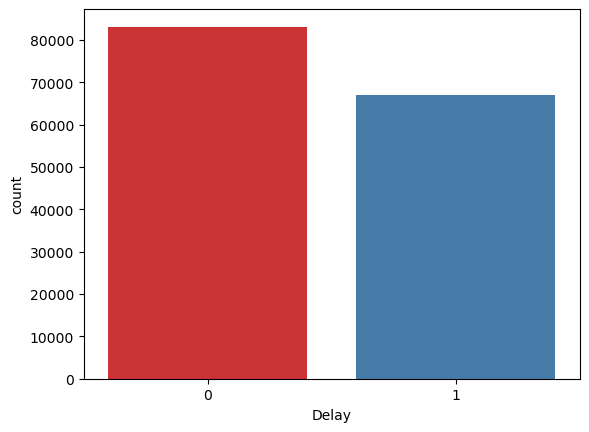

Delay
0    0.554013
1    0.445987
Name: proportion, dtype: float64

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Delay",data=df,palette="Set1")
plt.xlabel("Delay")
plt.ylabel("count")
plt.show()
df["Delay"].value_counts(normalize=True)

# From this count plot we observed that count of delayed is more than not delayed.

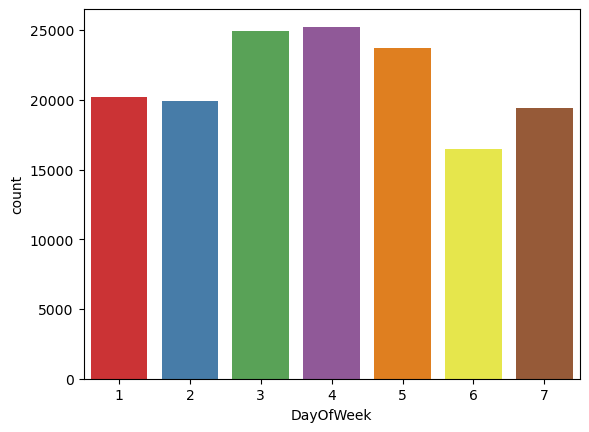

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="DayOfWeek",data=df,palette="Set1")
plt.xlabel("DayOfWeek")
plt.ylabel("count")
plt.show()

# We see that the middle days of the week is when the most flights are booked.

There are 18 unique Airlines in the dataset. We will see how often each airline has delays.

In [11]:
airlines =df['Airline'].unique()
airlines

array(['AS', 'HA', 'AA', 'CO', 'DL', 'US', 'B6', 'EV', 'OO', 'XE', 'WN',
       'YV', 'FL', 'MQ', 'UA', 'F9', 'OH', '9E'], dtype=object)

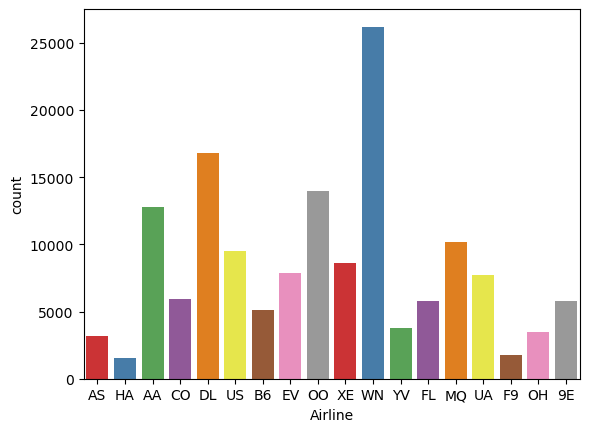

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Airline",data=df,palette="Set1")
plt.xlabel("Airline")
plt.ylabel("count")
plt.show()

# WN have the highest population in the dataset

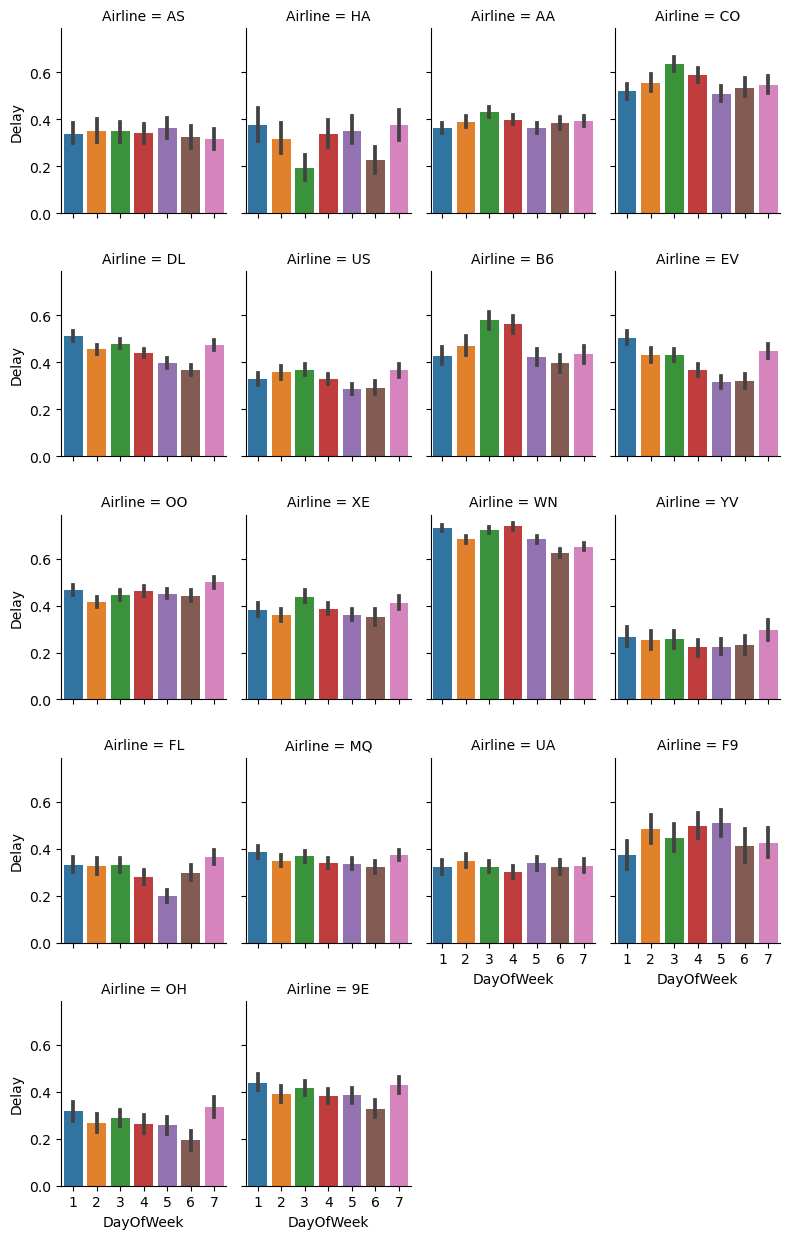

In [13]:
sns.catplot(data=df[df.notnull()], x='DayOfWeek',y='Delay',col_wrap = 4,
           col= 'Airline', kind="bar", height = 2.5, aspect=.8)

Text(0.5, 1.0, 'Day of week vs Delay Status')

<Figure size 1000x500 with 0 Axes>

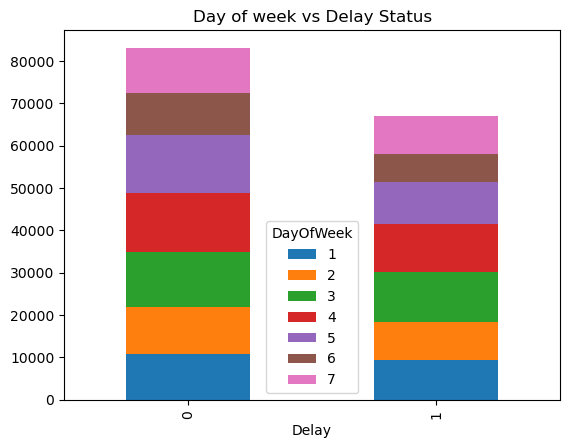

In [14]:
plt.figure(figsize=(10,5))
delay_flight=df.groupby(["Delay","DayOfWeek"]).size().unstack()
delay_flight.plot(kind='bar',stacked=True)
plt.title('Day of week vs Delay Status')

# From this bar plot we observed that wednesday,Thursday and friday has maximum rate of delay Airlines compare to other days in a week.
# close chances of airlines being delayed except for 6th day

Text(0.5, 1.0, 'pie chart')

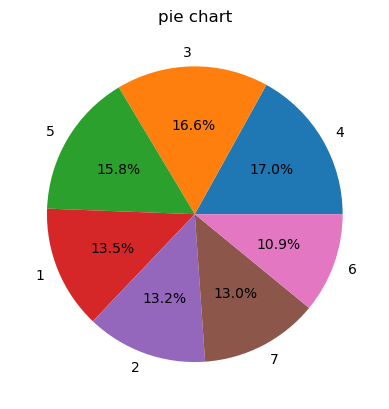

In [15]:
day_count=data['DayOfWeek'].value_counts()
plt.pie(day_count,labels=day_count.index,autopct='%1.1f%%')
plt.title('pie chart')

Text(0.5, 1.0, 'pie chart')

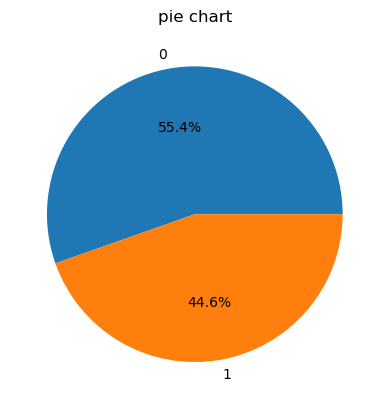

In [16]:
day_count=df['Delay'].value_counts()
plt.pie(day_count,labels=day_count.index,autopct='%1.1f%%')
plt.title('pie chart')

#  From Pie chart we conclude that delay has maximum praportion not delay. 

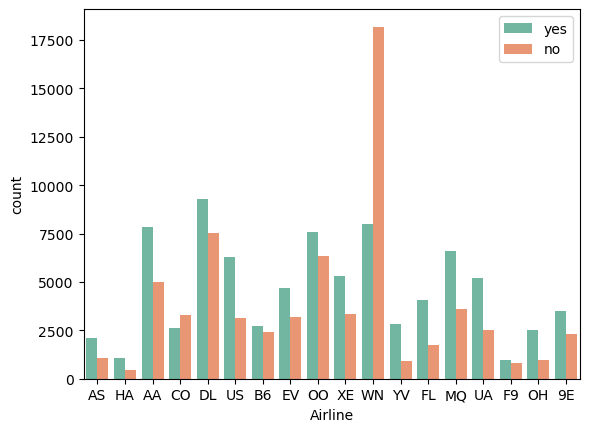

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1,1,1)
sns.countplot(x ='Airline',hue= "categorical data",palette='Set2',data=df)
plt.legend(["yes","no"],loc=0)
plt.show()

# Airline deemed to be delayed the most was WN.

C:\Users\Payal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Time', ylabel='Count'>

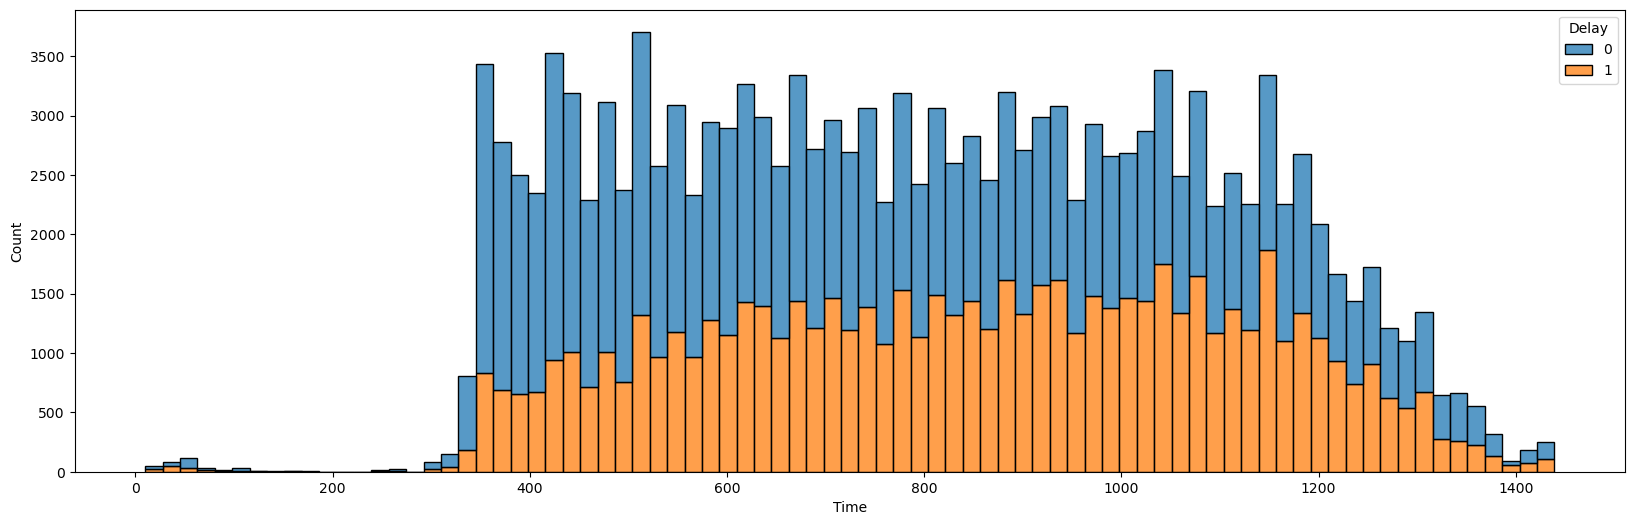

In [18]:
plt.figure(figsize=(20,6))
sns.histplot(x="Time",hue="Delay",data=df,multiple="stack")

# Most estimated flight time have a near equal chance of being delayed or not

C:\Users\Payal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


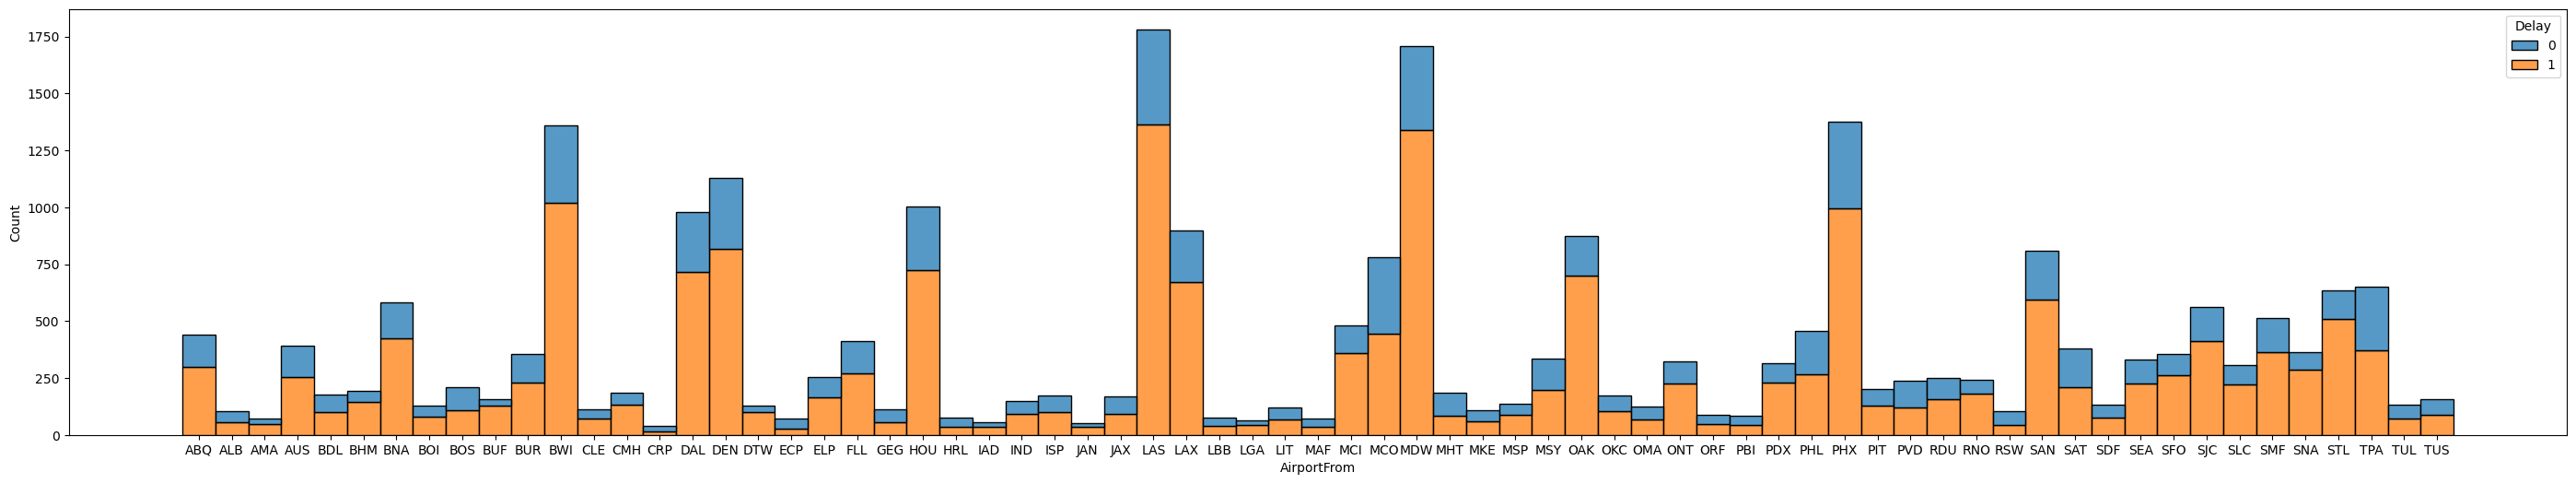

In [19]:
airport_WN = pd.DataFrame(df[df['Airline']=='WN'])
plt.figure(figsize=(35,6))
sns.histplot(x='AirportFrom',data=airport_WN.sort_values('AirportFrom'), hue='Delay', multiple='stack')
plt.show()

# It seems that each airport has a higher chance of being delayed.

C:\Users\Payal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AirportTo', ylabel='Count'>

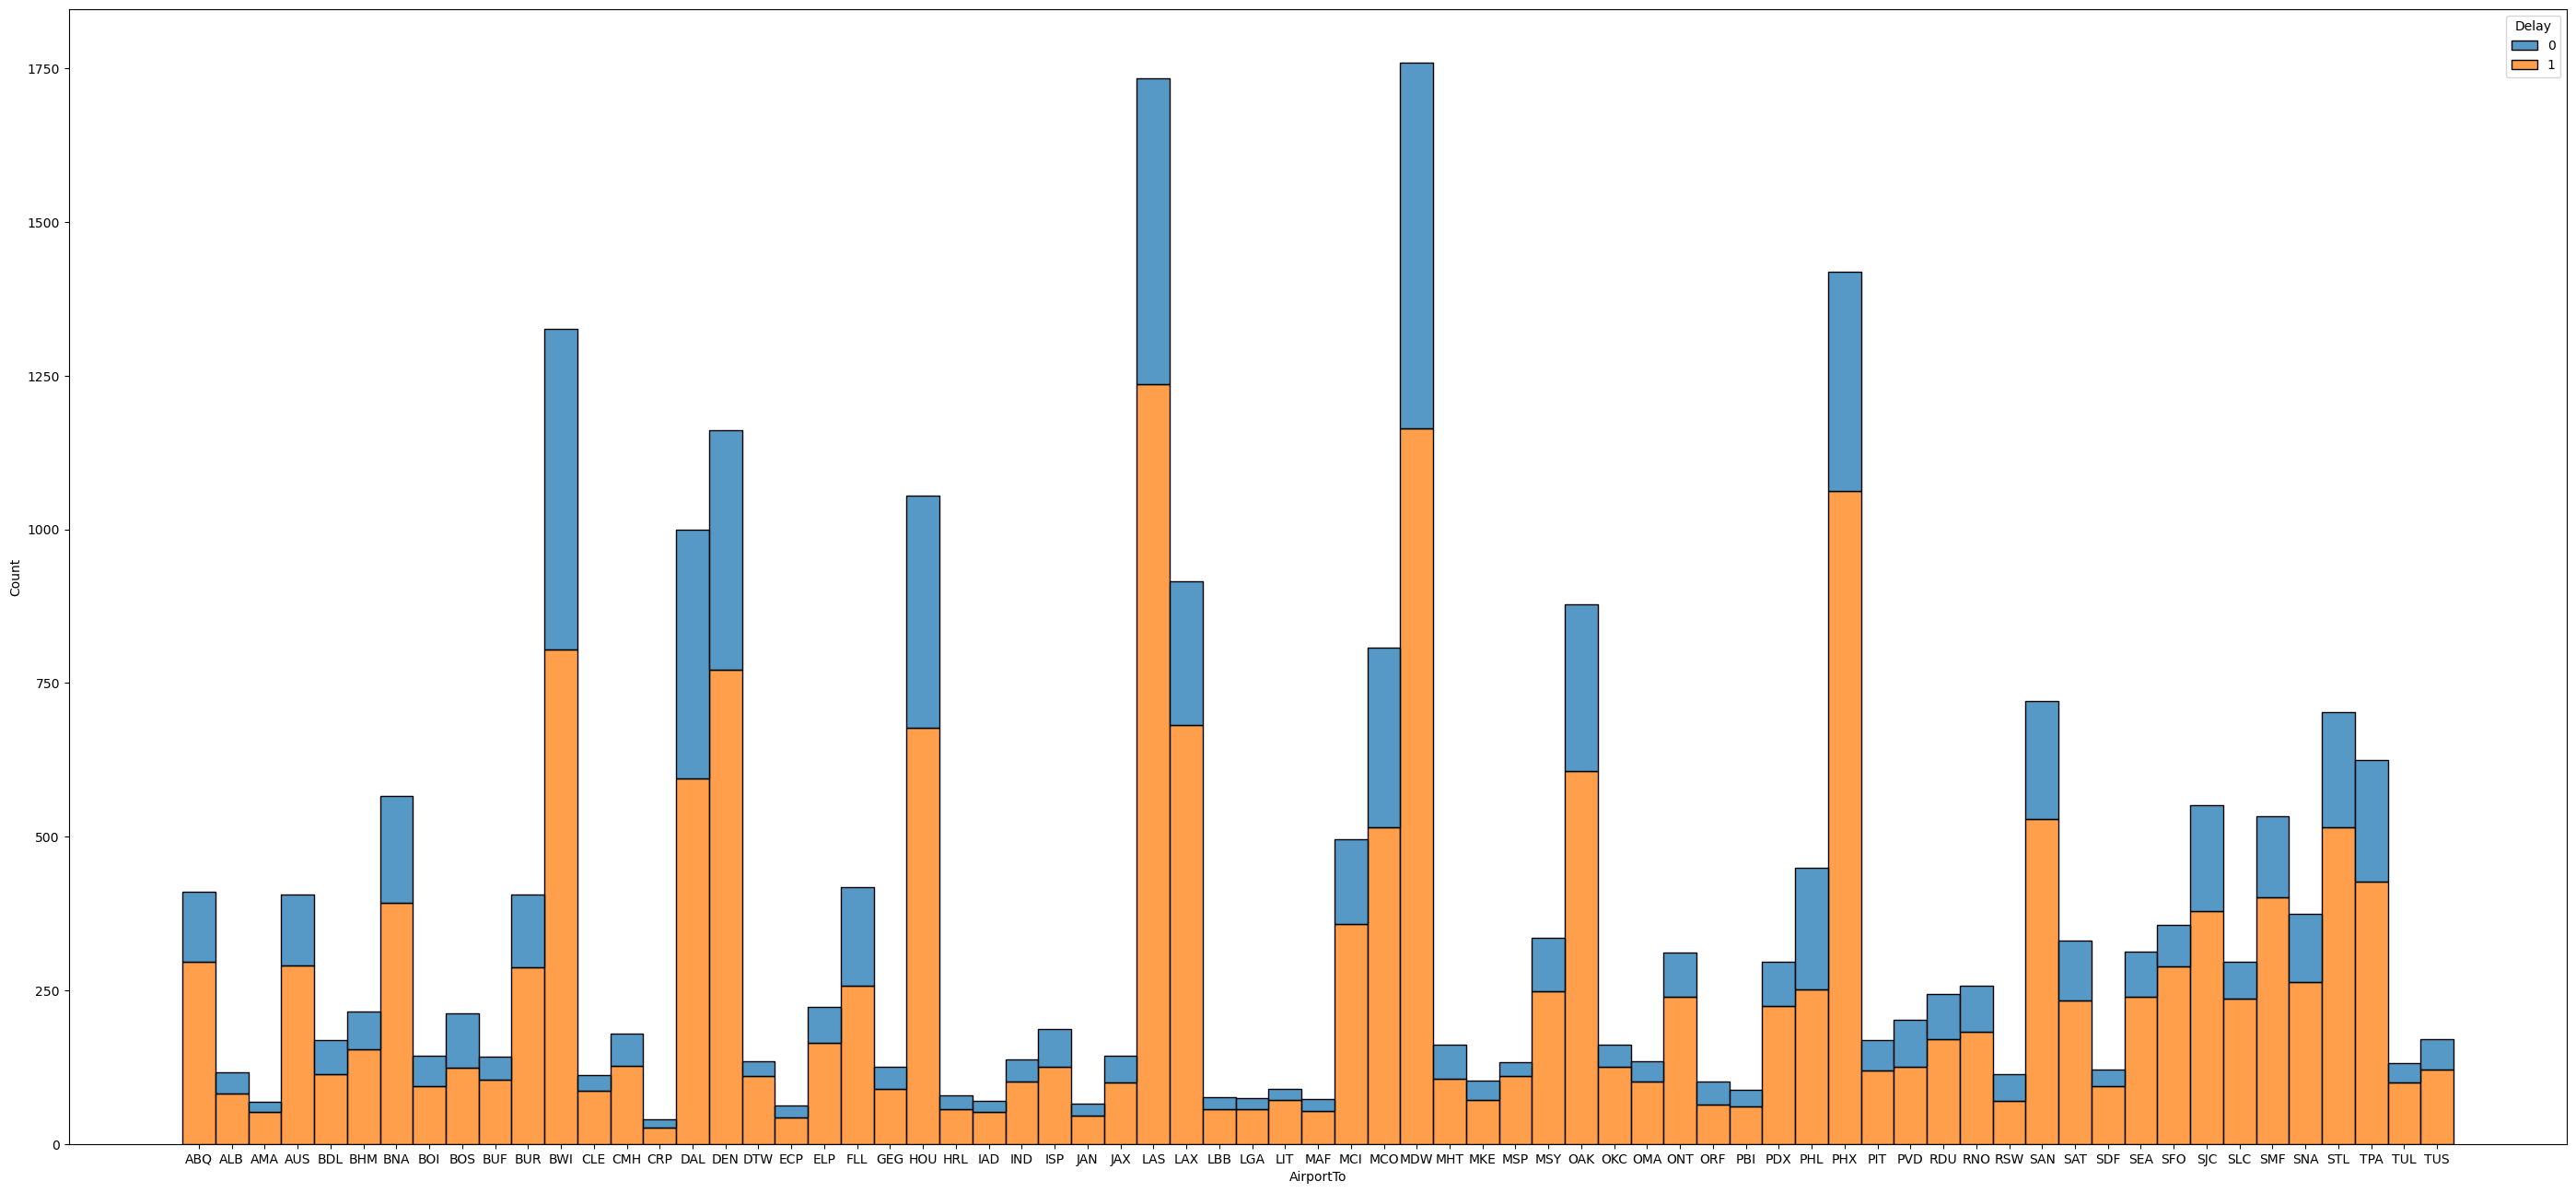

In [20]:
plt.figure(figsize=(35,16))
sns.histplot(x='AirportTo',data=airport_WN.sort_values('AirportTo'), hue='Delay', multiple='stack')

# Destination to airports McCarran International Airport(LAS) and Chicago Midway International Airport(MDW) occur the most

In [21]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder=LabelEncoder()
df["Airline"]=label_encoder.fit_transform(df["Airline"])
df["AirportFrom"]=label_encoder.fit_transform(df["AirportFrom"])
df["AirportTo"]=label_encoder.fit_transform(df["AirportTo"])
new_data=pd.DataFrame(df)
new_data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,categorical data
0,401189,2,621,153,213,4,1230,137,0,yes
1,125826,9,535,203,127,3,621,34,0,yes
2,315779,1,1905,78,79,7,600,225,0,yes
3,56533,4,229,79,95,6,505,223,1,no
4,95025,5,1430,184,84,1,840,82,0,yes
...,...,...,...,...,...,...,...,...,...,...
149995,10765,15,3762,153,235,3,905,80,1,no
149996,470329,14,926,147,59,2,420,83,1,no
149997,11381,12,6916,79,2,3,940,70,0,yes
149998,421343,0,3710,85,89,6,600,79,1,no


# Independent Variable

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
x=new_data.drop(columns=["Delay","Flight","categorical data"],axis=0)
x

,id,Airline,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,401189,2,153,213,4,1230,137
1,125826,9,203,127,3,621,34
2,315779,1,78,79,7,600,225
3,56533,4,79,95,6,505,223
4,95025,5,184,84,1,840,82
...,...,...,...,...,...,...,...
149995,10765,15,153,235,3,905,80
149996,470329,14,147,59,2,420,83
149997,11381,12,79,2,3,940,70
149998,421343,0,85,89,6,600,79


# Dependent Variable

In [23]:
y=new_data["Delay"]
y

0         0
1         0
2         0
3         1
4         0
         ..
149995    1
149996    1
149997    0
149998    1
149999    0
Name: Delay, Length: 150000, dtype: int64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
x_train.shape

(120000, 7)

In [25]:
x_test.shape

(30000, 7)

In [26]:
y_train.shape

(120000,)

In [27]:
y_test.shape

(30000,)

In [28]:
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_test shape: (30000, 7)
y_test shape: (30000,)


In [29]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)

x_train shape: (120000, 7)
y_train shape: (120000,)


# Model building
# 1)Logistic Regression:
# 2) Naive Bayes
# 3)Random Forest
# 4)KNN
# 5)Decision Tree
# 6)Bagging
# 7)GradientBoosting
# 8)XG Boost
# 9)Ada Boost


In [43]:
before_Accuracy={}
before_Accuracy

{}

# 1)Logistic Regression:

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg

LogisticRegression(max_iter=10000, random_state=42)

In [47]:
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [48]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [49]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5509


In [50]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.75      0.65     16599
           1       0.50      0.31      0.38     13401

    accuracy                           0.55     30000
   macro avg       0.53      0.53      0.51     30000
weighted avg       0.54      0.55      0.53     30000



In [51]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[12425  4174]
 [ 9299  4102]]


In [52]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.30609655995821206


In [53]:
precision=precision_score(y_test,y_pred)
print(precision)

0.49565007249879167


In [58]:
before_Accuracy['log_reg']=accuracy
before_Accuracy

{'log_reg': 0.5509}

#  After grid search CV

In [49]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [50]:
model = LogisticRegression(solver='liblinear', multi_class='auto')

param_grid = {'C': [0.01, 0.1, 1, 10, 100],'penalty': ['l1', 'l2']}
param_grid 

{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [51]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [52]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [53]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters found: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation accuracy: 0.6015


In [54]:
y_pred = grid_search.predict(x_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.5939666666666666
              precision    recall  f1-score   support

           0       0.61      0.74      0.67     16468
           1       0.57      0.41      0.48     13532

    accuracy                           0.59     30000
   macro avg       0.59      0.58      0.57     30000
weighted avg       0.59      0.59      0.58     30000



In [55]:
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.74      0.67     16468
           1       0.57      0.41      0.48     13532

    accuracy                           0.59     30000
   macro avg       0.59      0.58      0.57     30000
weighted avg       0.59      0.59      0.58     30000

Accuracy:  0.5939666666666666


# 2) Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [60]:
y_pred=gnb.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6028


In [62]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.75      0.68     16599
           1       0.58      0.42      0.49     13401

    accuracy                           0.60     30000
   macro avg       0.60      0.59      0.58     30000
weighted avg       0.60      0.60      0.59     30000



In [63]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[12438  4161]
 [ 7755  5646]]


In [64]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.4213118423998209


In [65]:
precision=precision_score(y_test,y_pred)
print(precision)

0.5757112266748241


In [66]:
before_Accuracy['naive_bayes']=accuracy
before_Accuracy

{'log_reg': 0.5509, 'naive_bayes': 0.6028}

#  After grid search CV

In [33]:
gnb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best model on the test set
y_pred = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred))

NameError: name 'GaussianNB' is not defined

# 3)Random Forest

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [68]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [69]:
y_pred = rf_clf.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [70]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6749


In [71]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72     16599
           1       0.66      0.56      0.61     13401

    accuracy                           0.67     30000
   macro avg       0.67      0.66      0.66     30000
weighted avg       0.67      0.67      0.67     30000



In [72]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[12738  3861]
 [ 5892  7509]]


In [73]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.5603313185583165


In [74]:
precision=precision_score(y_test,y_pred)
print(precision)

0.6604221635883905


In [76]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.6749


In [77]:
before_Accuracy['RF']=accuracy
before_Accuracy

{'log_reg': 0.5509, 'naive_bayes': 0.6028, 'RF': 0.6749}

# grid search CV

In [64]:
from sklearn.ensemble import RandomForestClassifier


In [65]:
model = RandomForestClassifier()

In [66]:
parameters = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],   
    'bootstrap': [True, False]        
}

In [67]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 4)KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [79]:
knn=KNeighborsClassifier(n_neighbors=7)
knn

KNeighborsClassifier(n_neighbors=7)

In [80]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [81]:
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [82]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5798333333333333


In [83]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.64     16599
           1       0.53      0.48      0.51     13401

    accuracy                           0.58     30000
   macro avg       0.57      0.57      0.57     30000
weighted avg       0.58      0.58      0.58     30000



In [84]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[10965  5634]
 [ 6971  6430]]


In [85]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.479814939183643


In [86]:
precision=precision_score(y_test,y_pred)
print(precision)

0.5329907161803713


In [87]:
before_Accuracy['KNN']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333}

# After grid search CV

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


In [57]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')


In [59]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [60]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-validation Score: 0.5901583333333333


In [62]:
y_pred = grid_search.predict(x_test)
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Test Set Accuracy: 0.5969666666666666
              precision    recall  f1-score   support

           0       0.63      0.68      0.66     16824
           1       0.55      0.49      0.51     13176

    accuracy                           0.60     30000
   macro avg       0.59      0.58      0.58     30000
weighted avg       0.59      0.60      0.59     30000



# 5)Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [89]:
dt=DecisionTreeClassifier(random_state=42)

In [90]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
y_pred=dt.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [92]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6079666666666667


In [93]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     16599
           1       0.56      0.56      0.56     13401

    accuracy                           0.61     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.61      0.61      0.61     30000



In [94]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[10690  5909]
 [ 5852  7549]]


In [95]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.5633161704350421


In [96]:
precision=precision_score(y_test,y_pred)
print(precision)

0.5609303016792986


In [97]:
before_Accuracy['DT']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667}

# After Grid search CV

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [75]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           verbose=2)

In [77]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [79]:
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [81]:
y_pred = grid_search.best_estimator_.predict(x_test)

In [82]:
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.73     16824
           1       0.66      0.50      0.57     13176

    accuracy                           0.67     30000
   macro avg       0.66      0.65      0.65     30000
weighted avg       0.66      0.67      0.66     30000

Accuracy:  0.6653666666666667


# 6)Bagging

In [98]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [99]:
base_clf=DecisionTreeClassifier()
base_clf
bagging_clf=BaggingClassifier(base_estimator=base_clf,n_estimators=100,random_state=42)
bagging_clf

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [100]:
bagging_clf.fit(x_train,y_train)

C:\Users\Payal\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [101]:
y_pred=bagging_clf.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [102]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6711333333333334


In [103]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.72     16599
           1       0.65      0.57      0.61     13401

    accuracy                           0.67     30000
   macro avg       0.67      0.66      0.66     30000
weighted avg       0.67      0.67      0.67     30000



In [104]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[12525  4074]
 [ 5792  7609]]


In [105]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.5677934482501306


In [106]:
precision=precision_score(y_test,y_pred)
print(precision)

0.6512881965248651


In [107]:
before_Accuracy['bagging']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667,
 'bagging': 0.6711333333333334}

# Grid Search CV

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [94]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

In [95]:
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [97]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\Payal\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=100, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [10, 50, 100]},
             verbose=2)

In [98]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best Estimator: BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_samples=0.5, n_estimators=100,
                  random_state=42)


In [100]:
y_pred = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73     16824
           1       0.67      0.55      0.60     13176

    accuracy                           0.68     30000
   macro avg       0.68      0.67      0.67     30000
weighted avg       0.68      0.68      0.67     30000



In [101]:
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73     16824
           1       0.67      0.55      0.60     13176

    accuracy                           0.68     30000
   macro avg       0.68      0.67      0.67     30000
weighted avg       0.68      0.68      0.67     30000

Accuracy:  0.6798666666666666


# 7)GradientBoosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gb_clf=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gb_clf

GradientBoostingClassifier(random_state=42)

In [110]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [111]:
y_pred=gb_clf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [112]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6633333333333333


In [113]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.80      0.73     16599
           1       0.67      0.49      0.56     13401

    accuracy                           0.66     30000
   macro avg       0.66      0.65      0.64     30000
weighted avg       0.66      0.66      0.65     30000



In [114]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[13361  3238]
 [ 6862  6539]]


In [115]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.4879486605477203


In [116]:
precision=precision_score(y_test,y_pred)
print(precision)

0.6688145647949268


In [117]:
before_Accuracy['Gradient boosting']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667,
 'bagging': 0.6711333333333334,
 'Gradient boosting': 0.6633333333333333}

# After Grid search cv

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best model on the test set
y_pred = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


# 8)XG Boost

In [118]:
!pip install xgboost
import xgboost as xgb

In [121]:
xgb_clf=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
xgb_clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [122]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [123]:
y_pred=xgb_clf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [124]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6635333333333333


In [125]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.81      0.73     16599
           1       0.67      0.49      0.56     13401

    accuracy                           0.66     30000
   macro avg       0.67      0.65      0.64     30000
weighted avg       0.66      0.66      0.65     30000



In [126]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[13392  3207]
 [ 6887  6514]]


In [127]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.4860831281247668


In [128]:
precision=precision_score(y_test,y_pred)
print(precision)

0.6700956691698385


In [129]:
before_Accuracy['XG']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667,
 'bagging': 0.6711333333333334,
 'Gradient boosting': 0.6633333333333333,
 'XG': 0.6635333333333333}

# After Grid  search CV

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best model on the test set
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

# 9)Ada Boost

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [131]:
ada_clf=AdaBoostClassifier(n_estimators=100,random_state=42)
ada_clf

AdaBoostClassifier(n_estimators=100, random_state=42)

In [132]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [133]:
y_pred=ada_clf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [134]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6590666666666667


In [135]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71     16599
           1       0.64      0.54      0.59     13401

    accuracy                           0.66     30000
   macro avg       0.66      0.65      0.65     30000
weighted avg       0.66      0.66      0.65     30000



In [136]:
print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Confusion matrix
[[12501  4098]
 [ 6130  7271]]


In [137]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
recall=recall_score(y_test,y_pred)
print(recall)

0.5425714498917992


In [138]:
precision=precision_score(y_test,y_pred)
print(precision)

0.639546134224646


In [139]:
before_Accuracy['ADA boost']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667,
 'bagging': 0.6711333333333334,
 'Gradient boosting': 0.6633333333333333,
 'XG': 0.6635333333333333,
 'ADA boost': 0.6590666666666667}

# After Grid search CV

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)

# Define the AdaBoostClassifier
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)

# Evaluate the best model on the test set
y_pred = best_estimator.predict(X_test)
print(classification_report(y_test, y_pred))

# 10)MPL

In [140]:
%pip install pandas scikit-learn
from sklearn.neural_network import MLPClassifier

Note: you may need to restart the kernel to use updated packages.


In [141]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=1000,alpha=0.0001,solver='adam',verbose=10,random_state=42,tol=0.0001)
mlp

MLPClassifier(max_iter=1000, random_state=42, verbose=10)

In [142]:
# Train the model
mlp.fit(x_train, y_train)

y_pred=ada_clf.predict(x_test)
y_pred

print("Classification Report:\n",classification_report(y_test,y_pred))

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))

Iteration 1, loss = 16.50265466
Iteration 2, loss = 16.34329268
Iteration 3, loss = 16.37370932
Iteration 4, loss = 16.35517245
Iteration 5, loss = 16.18562799
Iteration 6, loss = 16.15621161
Iteration 7, loss = 16.17093280
Iteration 8, loss = 16.12984590
Iteration 9, loss = 16.01845964
Iteration 10, loss = 15.78440164
Iteration 11, loss = 16.33371385
Iteration 12, loss = 16.03562549
Iteration 13, loss = 15.93144510
Iteration 14, loss = 16.22230470
Iteration 15, loss = 16.27333011
Iteration 16, loss = 16.04449963
Iteration 17, loss = 16.15351779
Iteration 18, loss = 15.83701421
Iteration 19, loss = 16.20951036
Iteration 20, loss = 15.82088900
Iteration 21, loss = 15.83413368
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71     16599
           1       0.64      0.54      0.59     13401

    accuracy                          

In [143]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6590666666666667


In [144]:
before_Accuracy['MPL']=accuracy
before_Accuracy

{'log_reg': 0.5509,
 'naive_bayes': 0.6028,
 'RF': 0.6749,
 'KNN': 0.5798333333333333,
 'DT': 0.6079666666666667,
 'bagging': 0.6711333333333334,
 'Gradient boosting': 0.6633333333333333,
 'XG': 0.6635333333333333,
 'ADA boost': 0.6590666666666667,
 'MPL': 0.6590666666666667}

In [2]:
import pandas as pd
result={"Index":[1,2,3,4,5,6,7,8,9,10],
        "Model":["LR","Naive","RF","KNN","DT","Bagging","G-Boost","XG-Boost","Ada boost","MPL"],
        "before_cv_Accuracy":[0.55,0.60,0.671,0.57,0.60,0.67,0.66,0.66,0.65,0.65],
        "After_cv_Accuracy":[0.60,0.60,0.00,0.59,0.66,0.67,0.00,0.00,0.00,0.00],
        "After_Feature_imp_accuracy":[0.56,0.57,0.60,0.61,0.59,0.60,0.60,0.60,0.60,0.60],
        "before_cv_F1-score":[0.37,0.487,0.57,0.50,0.50,0.56,0.60,0.55,0.55,0.55],
     "After_cv_F1-score":[0.57,0.48,0.00,0.51,0.57,0.60,0.00,0.00,0.00,0.00],
      "After_Feature_imp_F1_score":[0.43,0.58,0.62,0.53,0.53,0.56,0.40,0.50,0.53,0.70],
"before_cv_Precision":[0.495,0.5734,0.6191,0.53,0.55,0.64,0.60,0.60,0.59,0.650],
        "After_cv_pricision":[0.47,0.57,0.00,0.55,0.66,0.67,0.00,0.00,0.00,0.00],
        "After_feature_imp_precision":[0.58,0.54,0.56,0.58,0.54,0.556,0.57,0.57,0.56,0.56],
        "before_cv_Recall":[0.31,0.41,0.56,0.48,0.56,0.57,0.48,0.49,0.54,0.54],
        "After_cv_Recall":[0.41,0.56,0.00,0.49,0.50,0.55,0.00,0.00,0.00,0.00],
        "After_feature_Recall":[0.32,0.38,0.52,0.50,0.50,0.53,0.44,0.44,0.44,0.44]
}
d=pd.DataFrame(result)
d

,Index,Model,before_cv_Accuracy,After_cv_Accuracy,After_Feature_imp_accuracy,before_cv_F1-score,After_cv_F1-score,After_Feature_imp_F1_score,before_cv_Precision,After_cv_pricision,After_feature_imp_precision,before_cv_Recall,After_cv_Recall,After_feature_Recall
0,1,LR,0.550,0.60,0.56,0.370,0.57,0.43,0.4950,0.47,0.580,0.31,0.41,0.32
1,2,Naive,0.600,0.60,0.57,0.487,0.48,0.58,0.5734,0.57,0.540,0.41,0.56,0.38
2,3,RF,0.671,0.00,0.60,0.570,0.00,0.62,0.6191,0.00,0.560,0.56,0.00,0.52
3,4,KNN,0.570,0.59,0.61,0.500,0.51,0.53,0.5300,0.55,0.580,0.48,0.49,0.50
4,5,DT,0.600,0.66,0.59,0.500,0.57,0.53,0.5500,0.66,0.540,0.56,0.50,0.50
5,6,Bagging,0.670,0.67,0.60,0.560,0.60,0.56,0.6400,0.67,0.556,0.57,0.55,0.53
6,7,G-Boost,0.660,0.00,0.60,0.600,0.00,0.40,0.6000,0.00,0.570,0.48,0.00,0.44
7,8,XG-Boost,0.660,0.00,0.60,0.550,0.00,0.50,0.6000,0.00,0.570,0.49,0.00,0.44
8,9,Ada boost,0.650,0.00,0.60,0.550,0.00,0.53,0.5900,0.00,0.560,0.54,0.00,0.44
9,10,MPL,0.650,0.00,0.60,0.550,0.00,0.70,0.6500,0.00,0.560,0.54,0.00,0.44


# for before cv Data frame

In [7]:
import pandas as pd
for_before_model={"Index":[1,2,3,4,5,6,7,8,9,10],
        "Model":["LR","Naive","RF","KNN","DT","Bagging","G-Boost","XG-Boost","Ada boost","MPL"],
        "Accuracy":[0.56,0.57,0.60,0.61,0.59,0.60,0.60,0.60,0.60,0.60],
        "Recall":[0.32,0.38,0.52,0.50,0.50,0.53,0.44,0.44,0.44,0.44],
        "F1-score":[0.43,0.58,0.62,0.53,0.53,0.56,0.40,0.50,0.53,0.70],
                 "precision":[0.495,0.5734,0.6191,0.53,0.55,0.64,0.60,0.60,0.59,0.650]}
p2=pd.DataFrame(for_before_model)
p2

,Index,Model,Accuracy,Recall,F1-score,precision
0,1,LR,0.56,0.32,0.43,0.4950
1,2,Naive,0.57,0.38,0.58,0.5734
2,3,RF,0.60,0.52,0.62,0.6191
3,4,KNN,0.61,0.50,0.53,0.5300
4,5,DT,0.59,0.50,0.53,0.5500
5,6,Bagging,0.60,0.53,0.56,0.6400
6,7,G-Boost,0.60,0.44,0.40,0.6000
7,8,XG-Boost,0.60,0.44,0.50,0.6000
8,9,Ada boost,0.60,0.44,0.53,0.5900
9,10,MPL,0.60,0.44,0.70,0.6500


In [6]:
import pandas as pd
for_after_model={"Index":[1,2,3,4,5,6,7,8,9,10],
        "Model":["LR","Naive","RF","KNN","DT","Bagging","G-Boost","XG-Boost","Ada boost","MPL"],
        "Accuracy":[0.60,0.60,0.00,0.59,0.66,0.67,0.00,0.00,0.00,0.00],
        "Recall":[0.41,0.56,0.00,0.49,0.50,0.55,0.00,0.00,0.00,0.00],
        "F1-score":[0.57,0.48,0.00,0.51,0.57,0.60,0.00,0.00,0.00,0.00],
                 "precision":[0.58,0.54,0.56,0.58,0.54,0.556,0.57,0.57,0.56,0.56]}
p3=pd.DataFrame(for_after_model)
p3

,Index,Model,Accuracy,Recall,F1-score,precision
0,1,LR,0.60,0.41,0.57,0.47
1,2,Naive,0.60,0.56,0.48,0.57
2,3,RF,0.00,0.00,0.00,0.00
3,4,KNN,0.59,0.49,0.51,0.55
4,5,DT,0.66,0.50,0.57,0.66
5,6,Bagging,0.67,0.55,0.60,0.67
6,7,G-Boost,0.00,0.00,0.00,0.00
7,8,XG-Boost,0.00,0.00,0.00,0.00
8,9,Ada boost,0.00,0.00,0.00,0.00
9,10,MPL,0.00,0.00,0.00,0.00


# Plots

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
models = d['Model']
accuracies = d['before_Accuracy']


Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

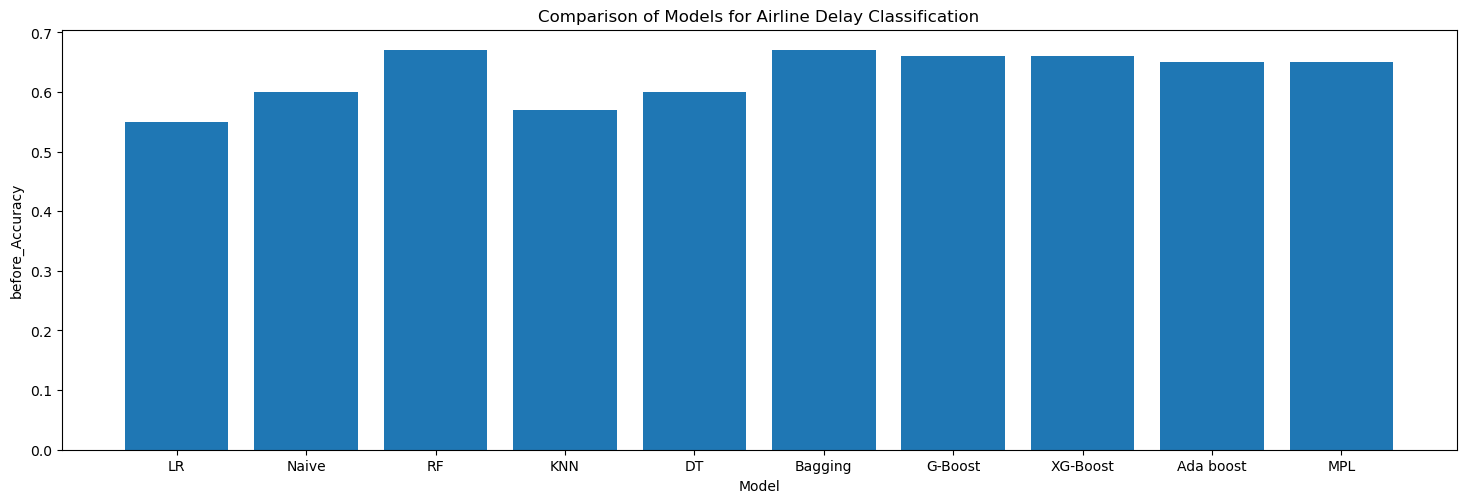

In [72]:
plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,accuracies)
plt.xlabel('Model')
plt.ylabel('before_Accuracy')
plt.title('Comparison of Models for Airline Delay Classification')

# Before using Grid CV Bagging and RF Algorithm have highest Accuracy

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

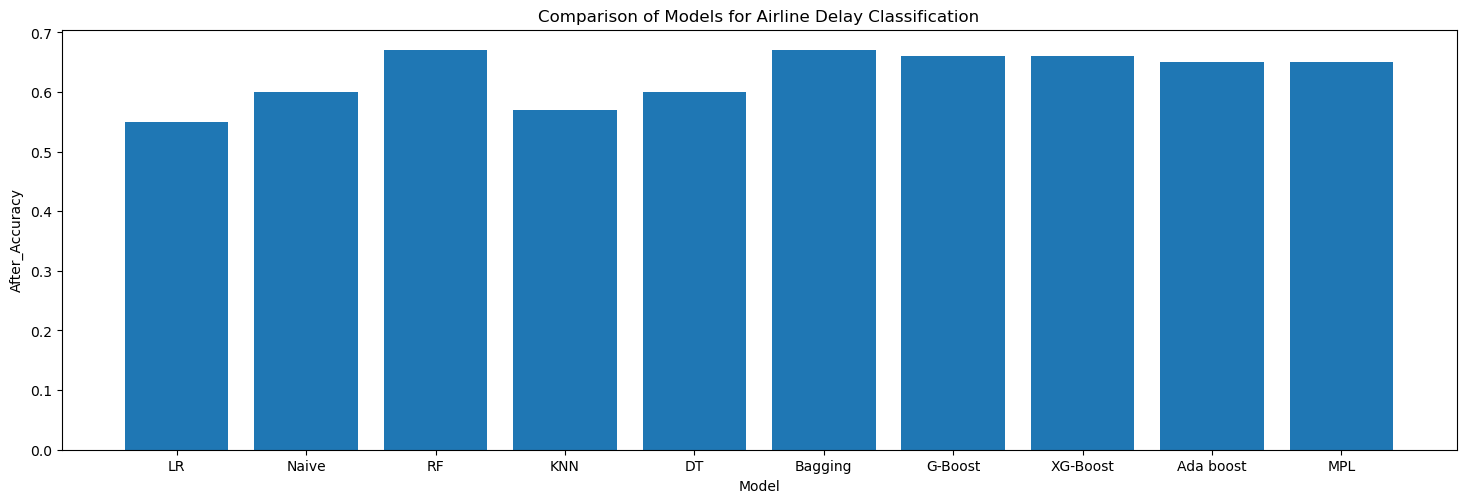

In [73]:
models = d['Model']
accuricies = d['After_Accuracy']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,accuracies)
plt.xlabel('Model')
plt.ylabel('After_Accuracy')
plt.title('Comparison of Models for Airline Delay Classification')

# After using Grid CV Bagging and RF Algorithm have highest Accuracy

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

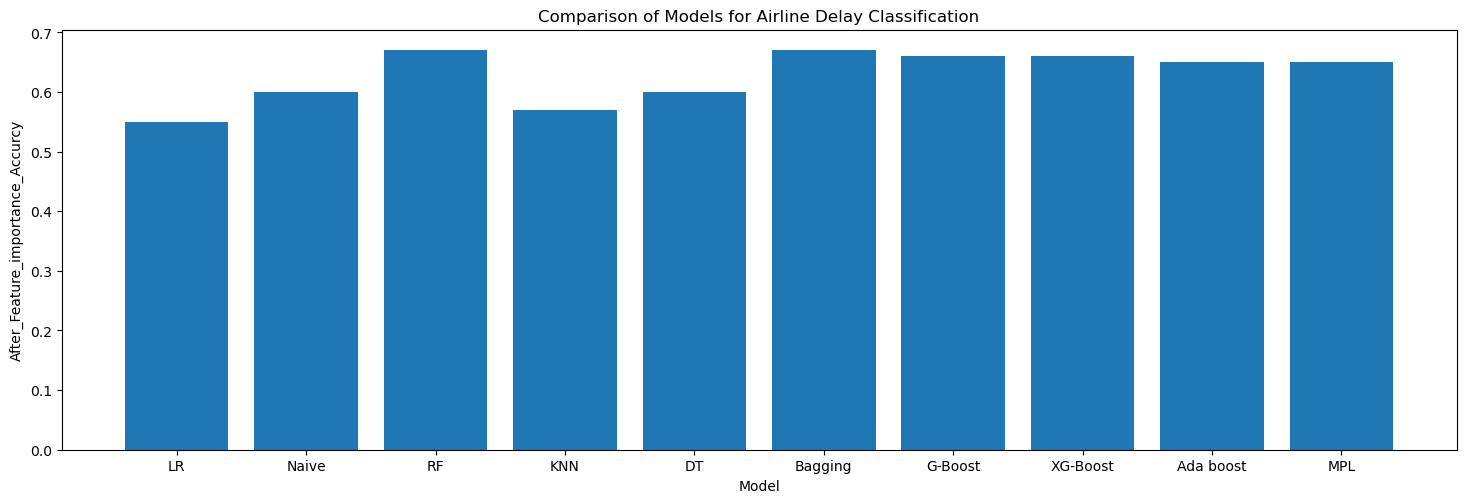

In [74]:
models = d['Model']
accuricies = d['After_Feature_importance']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,accuracies)
plt.xlabel('Model')
plt.ylabel('After_Feature_importance_Accurcy')
plt.title('Comparison of Models for Airline Delay Classification')

# After feature importance RF and Bagging have highest Accuracy

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

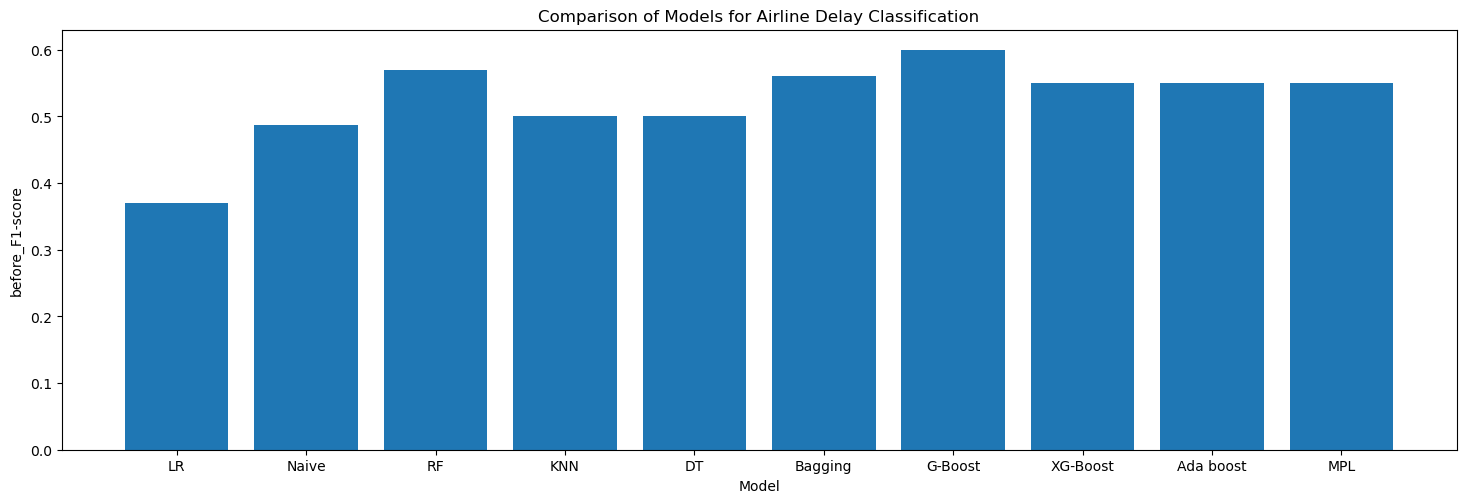

In [75]:
models = d['Model']
F1 = d['before_F1-score']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,F1)
plt.xlabel('Model')
plt.ylabel('before_F1-score')
plt.title('Comparison of Models for Airline Delay Classification')

# Before CV  G-Boost having highest F1-Score 

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

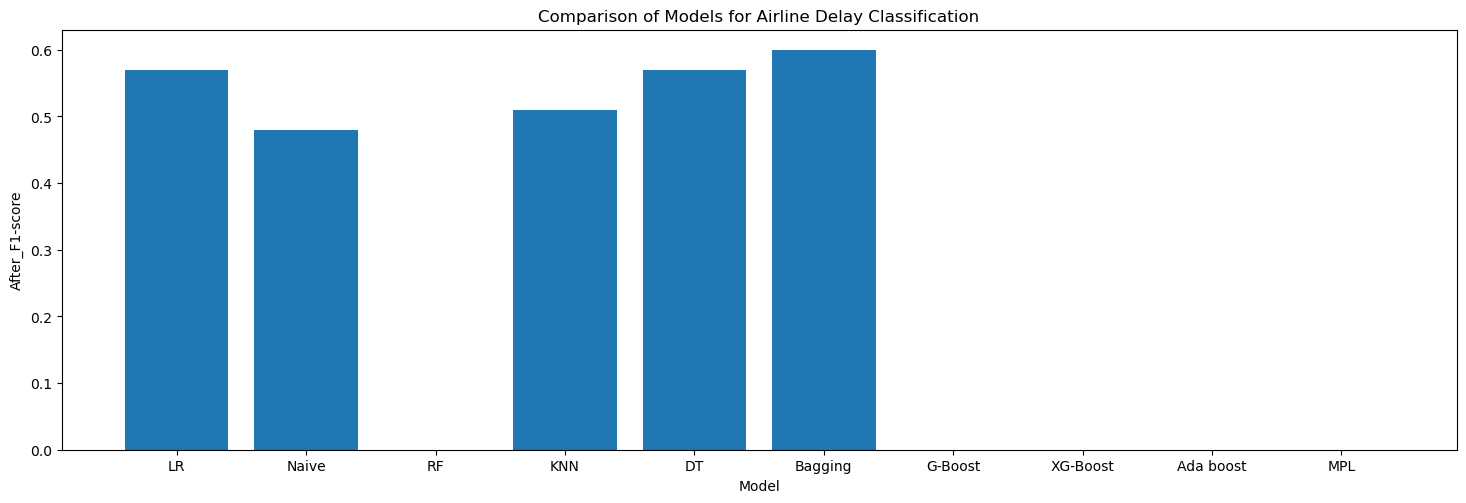

In [76]:
models = d['Model']
F2 = d['After_F1-score']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,F2)
plt.xlabel('Model')
plt.ylabel('After_F1-score')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

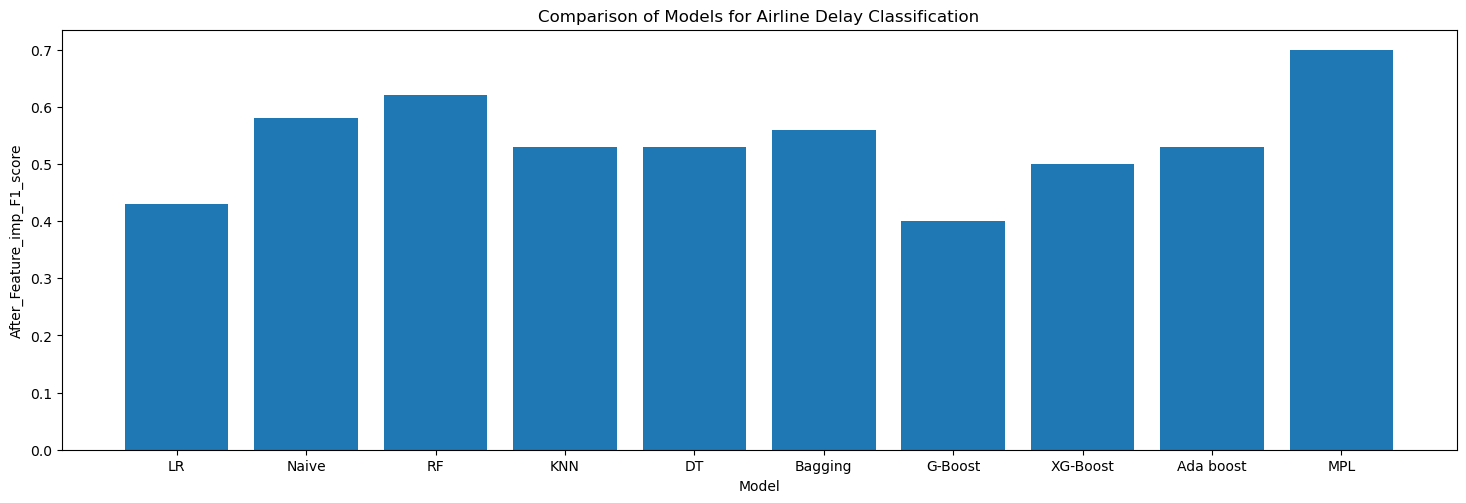

In [78]:
models = d['Model']
F3 = d['After_Feature_imp_F1_score']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,F3)
plt.xlabel('Model')
plt.ylabel('After_Feature_imp_F1_score')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

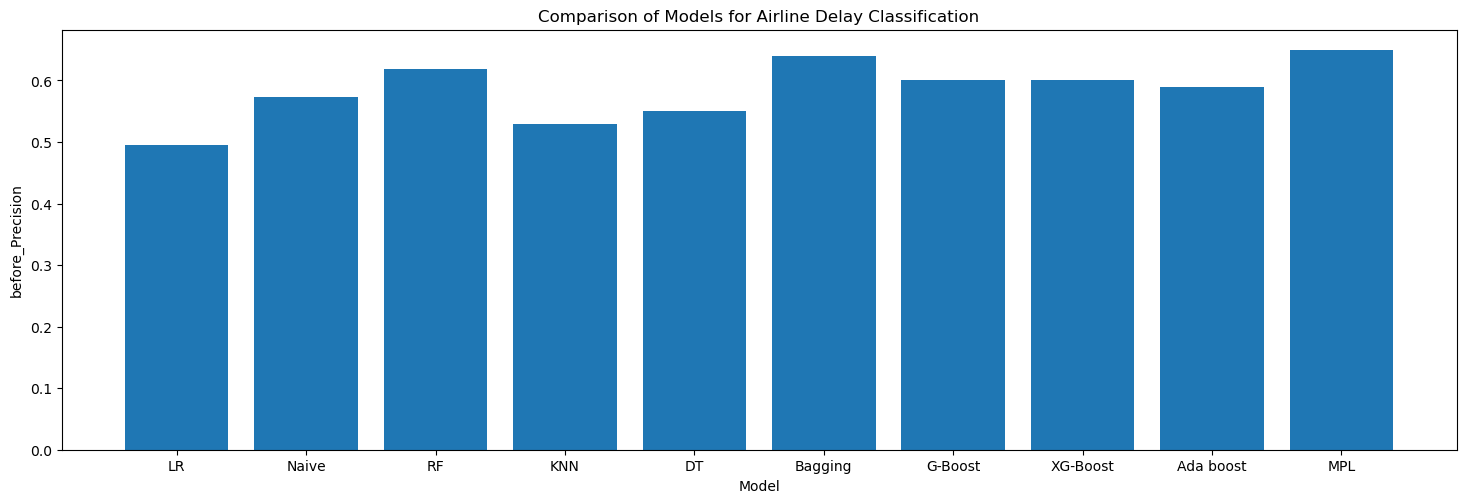

In [79]:
models = d['Model']
p1 = d['before_Precision']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,p1)
plt.xlabel('Model')
plt.ylabel('before_Precision')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

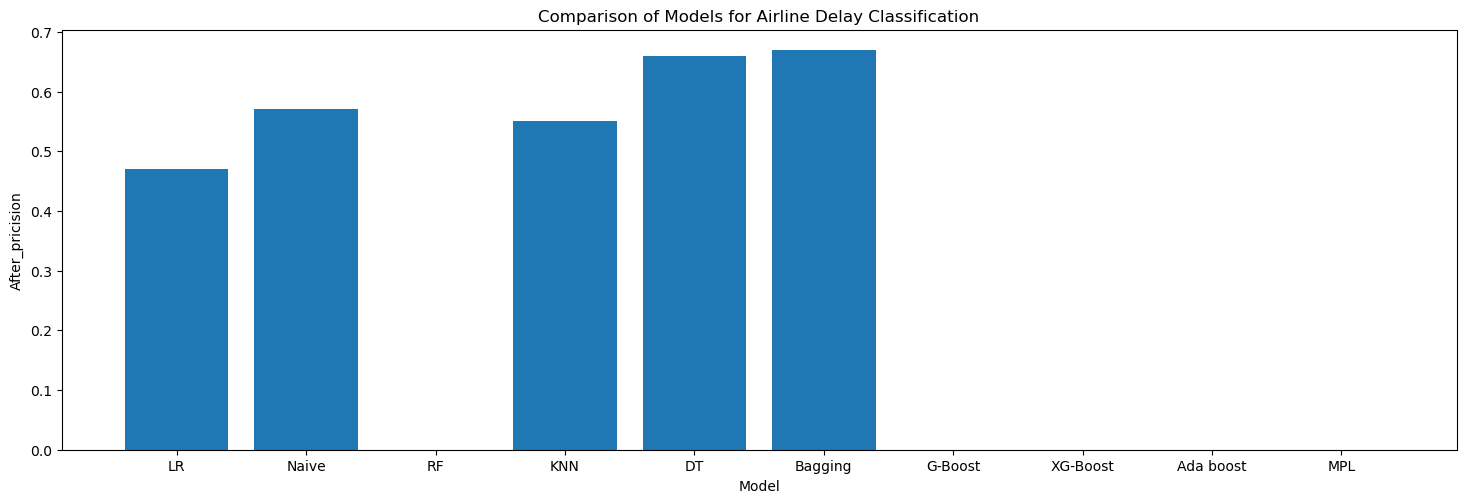

In [80]:
models = d['Model']
p2 = d['After_pricision']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,p2)
plt.xlabel('Model')
plt.ylabel('After_pricision')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

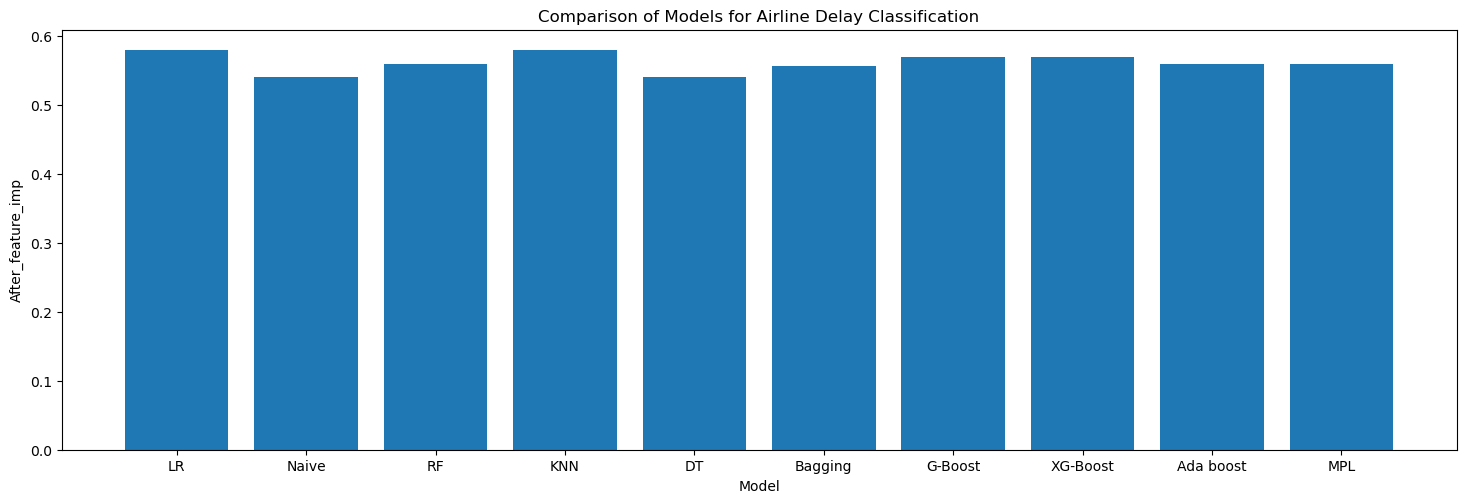

In [81]:
models = d['Model']
p3 = d['After)_feature_imp']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,p3)
plt.xlabel('Model')
plt.ylabel('After_feature_imp')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

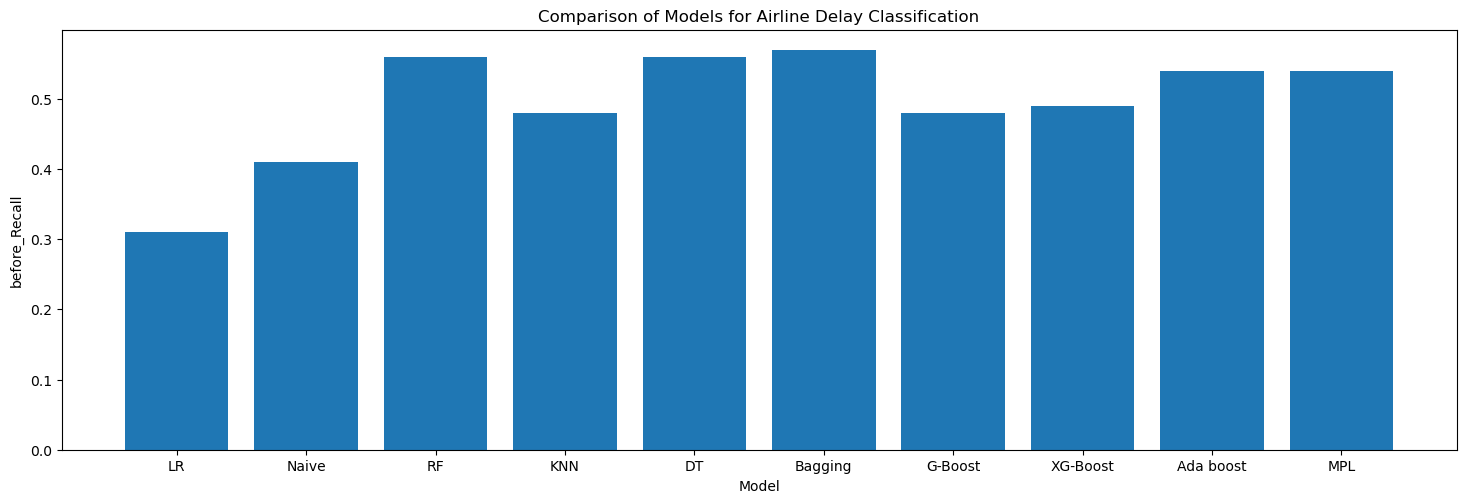

In [82]:
models = d['Model']
R1 = d['before_Recall']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,R1)
plt.xlabel('Model')
plt.ylabel('before_Recall')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

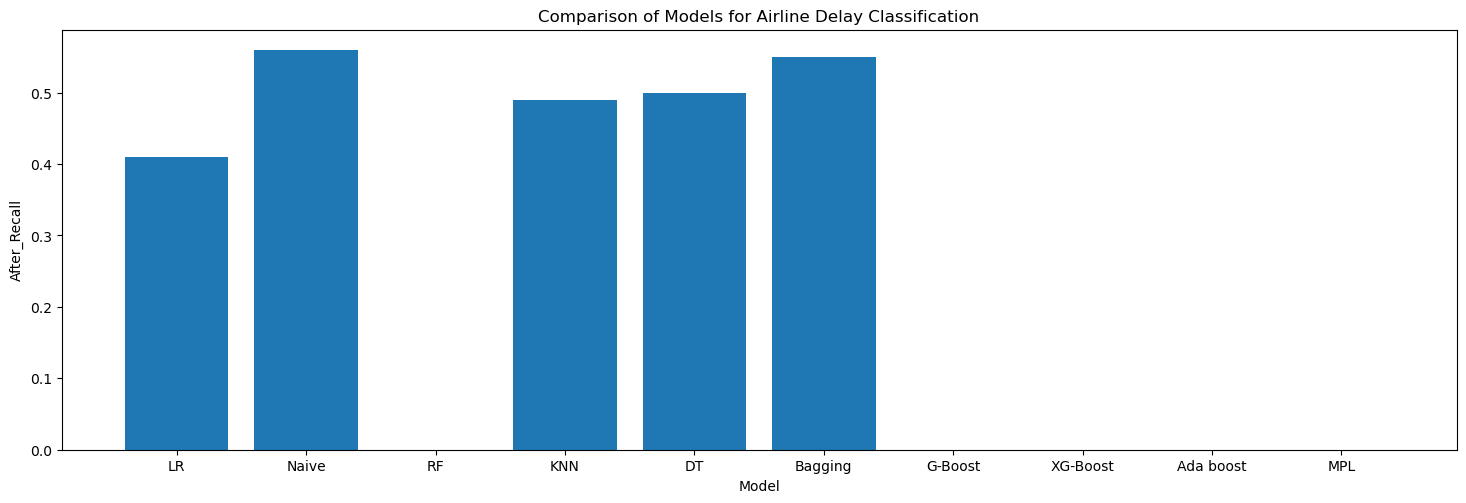

In [83]:
models = d['Model']
R2 = d['After_Recall']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,R2)
plt.xlabel('Model')
plt.ylabel('After_Recall')
plt.title('Comparison of Models for Airline Delay Classification')

Text(0.5, 1.0, 'Comparison of Models for Airline Delay Classification')

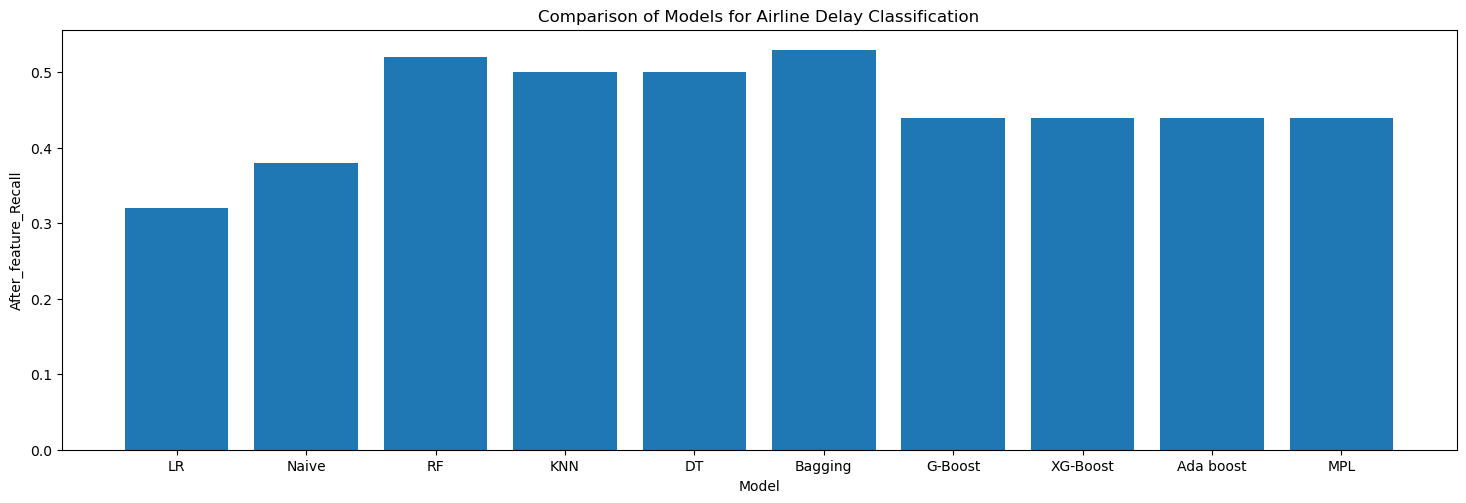

In [84]:
models = d['Model']
R3 = d['After_feature_Recall']

plt.figure(figsize=(18, 12))
plt.subplot(2,1,1)
plt.bar(models,R3)
plt.xlabel('Model')
plt.ylabel('After_feature_Recall')
plt.title('Comparison of Models for Airline Delay Classification')